In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
# import tensorflow as tf

In [2]:
# ?load the clean data
df = pd.read_csv('framingham_cleandata.csv')
# Dropping Unnamed:0 column
df = df.drop(['Unnamed: 0'], axis=1)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
#Shape of dataset
print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


### Based on the Correlation between different features, education is not relavent.

In [4]:
# Dropping Education column
df = df.drop(['education'], axis=1)

In [5]:
#Descriptive Stats
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Prepare the data set: Scale, and undersampling method.

In [6]:
# RandomForest Model
X=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD'] != 1

In [7]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Scale the data and fit the model
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print(len(X_train))
len(X_test)

3180


1060

## Logistic Regression

In [9]:
# Train the Logistic Regression model on the unscaled data and print the model score
# create logistic model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\esthe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# # Make the predictions
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8503144654088051
Testing Data Score: 0.8509433962264151


## Undersampling Imbalanced Dataset

In [11]:
# # undersampling imbalanced dataset and create new df
# sampl_df = df.sample(frac=1,random_state=42)

# # Put all the fraud class in a separate dataset.
# fraud_df = sampl_df.loc[sampl_df['TenYearCHD'] == 1]

# #Randomly select observations from the non-fraud (majority class)
# non_fraud_df = sampl_df.loc[sampl_df['TenYearCHD'] == 0].sample(n=660,random_state=42)

# # Concatenate both dataframes again
# normalized_df = pd.concat([fraud_df, non_fraud_df])

# # check new class counts
# normalized_df.TenYearCHD.value_counts()

# # plot new count
# sns.countplot(normalized_df.TenYearCHD, palette="Blues")
# plt.box(False)
# plt.xlabel('Heart Disease No/Yes',fontsize=11)
# plt.ylabel('Patient Count',fontsize=11)
# plt.title('Count Outcome Heart Disease after Resampling\n')
# #plt.savefig('Balance Heart Disease.png')
# plt.show()

In [12]:
# print ('No. of Records :', normalized_df.shape[0], '\nNo. of Features : ', normalized_df.shape[1])

## RandomForest 

In [13]:
# Validate the model by using test data and print the score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
clf

Training Score: 1.0
Testing Score: 0.8462264150943396


RandomForestClassifier(n_estimators=500, random_state=1)

## RandomForest Feature Selection

In [14]:
feature_importances = clf.feature_importances_
feature_importances

array([0.02281769, 0.12280679, 0.01242954, 0.05347072, 0.00716012,
       0.00273731, 0.01773998, 0.00747853, 0.13027085, 0.14619729,
       0.11941091, 0.13786157, 0.10033264, 0.11928608])

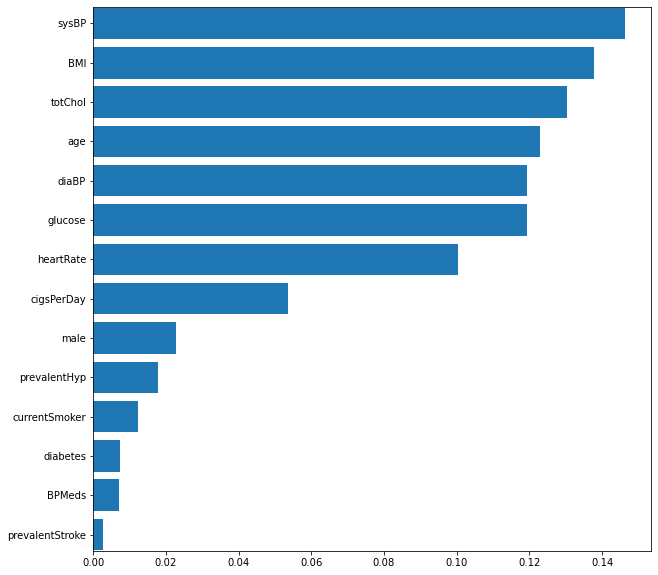

<Figure size 432x288 with 0 Axes>

In [15]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()
plt.savefig("Template/Resources/assets/images/important_features.png")

In [16]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [17]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


In [18]:
from sklearn.linear_model import LinearRegression
model_one = LinearRegression()

# Fitting our model with all our features in X
model_one.fit(X_train_scaled, y_train)

score_train_lin = model_one.score(X_train_scaled, y_train)
score_test_lin = model_one.score(X_test_scaled, y_test)
print(f"R2 Score: {score_train_lin}")
print(f"R2 Score: {score_test_lin}")

R2 Score: 0.09019236564441435
R2 Score: 0.11199925915526043


In [19]:
model_two = LogisticRegression().fit(X_train_scaled, y_train)
score_train_log = model_two.score(X_train_scaled, y_train)
score_test_log = model_two.score(X_test_scaled, y_test)
print(f'Training Score: {score_train_log}')
print(f'Testing Score: {score_test_log}')

Training Score: 0.8550314465408805
Testing Score: 0.8556603773584905


In [20]:
clf_one = LinearRegression()
clf_one.fit(X_selected_train_scaled, y_train)
score_train_lin_selected = clf_one.score(X_selected_train_scaled, y_train)
score_test_lin_selected = clf_one.score(X_selected_test_scaled, y_test)
print(f'Training Score: {score_train_lin_selected}')
print(f'Testing Score: {score_test_lin_selected}')

Training Score: 0.06902221056794688
Testing Score: 0.0976517263168436


In [21]:
clf_two = LogisticRegression()
clf_two.fit(X_selected_train_scaled, y_train)
score_train_log_selected = clf_two.score(X_selected_train_scaled, y_train)
score_test_log_selected = clf_two.score(X_selected_test_scaled, y_test)
print(f'Training Score: {score_train_log_selected}')
print(f'Testing Score: {score_test_log_selected}')

Training Score: 0.85
Testing Score: 0.85


### Confusion Matrix

In [22]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
# manually predict
y_true = y_test
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_true, y_pred))

[[  6 156]
 [  2 896]]


In [23]:
TP = 781
FP = 148
TN = 4
FN = 5
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.8368869936034116


## Deep Learning Model

In [24]:
import tensorflow as tf
X=df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD'] != 1
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=14))
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)
model_fit_loss, model_fit_train = nn_model.evaluate(X_train_scaled, y_train, verbose=2)
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.8406
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8484
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8497
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8506
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8522
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8522
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8528
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8560
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8550
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8579

## KNN Model

In [26]:
# split the data into test and train to create KNN model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [27]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.775
k: 2, Train/Test Score: 0.899/0.708
k: 3, Train/Test Score: 0.896/0.816
k: 4, Train/Test Score: 0.878/0.798
k: 5, Train/Test Score: 0.873/0.818
k: 6, Train/Test Score: 0.869/0.818
k: 7, Train/Test Score: 0.861/0.841
k: 8, Train/Test Score: 0.864/0.834
k: 9, Train/Test Score: 0.858/0.845
k: 10, Train/Test Score: 0.860/0.835


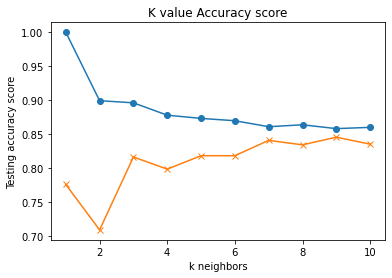

<Figure size 432x288 with 0 Axes>

In [28]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 11), train_scores, marker='o')
plt.plot(range(1, 11), test_scores, marker="x")
plt.title("K value Accuracy score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()
plt.savefig("Template/Resources/assets/images/K Neighbors.png")

In [29]:
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
knn_train_acc = knn.score(X_train_scaled, y_train)
knn_test_acc = knn.score(X_test_scaled, y_test)

k=7 Test Acc: 0.841


In [30]:
from sklearn.metrics import roc_curve

In [31]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

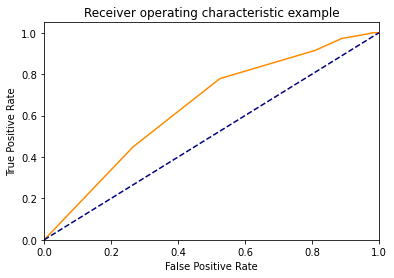

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
plt.savefig("Template/Resources/assets/images/ROC_graph.png")

In [33]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
roc_auc

0.6444121367098352

## SVM Model

In [34]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.847


In [36]:
svm_train_score = model.score(X_train, y_train)
svm_test_score = model.score(X_test, y_test)

In [37]:
model_accuracy

0.8283019065856934

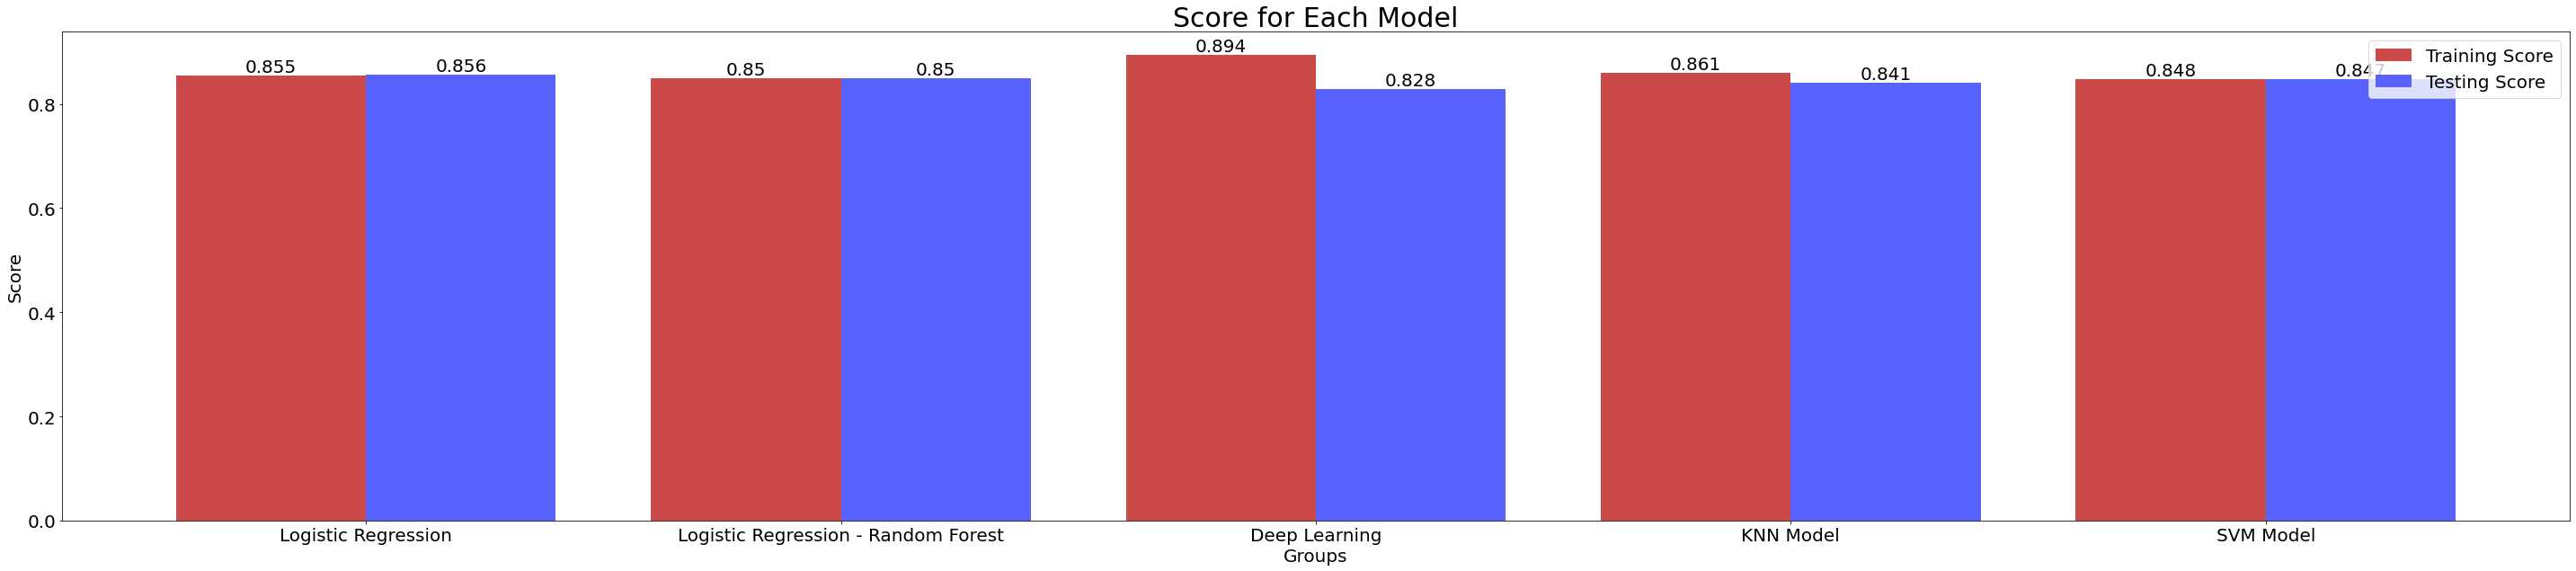

In [81]:
categories = ['Logistic Regression', 'Logistic Regression - Random Forest', 'Deep Learning', 'KNN Model', 'SVM Model']
training_score = [score_train_log,  score_train_log_selected, model_fit_train, knn_train_acc, svm_train_score]
testing_score = [score_test_log, score_test_log_selected, model_accuracy, knn_test_acc, svm_test_score]
X_axis = np.arange(len(categories))
#rect_1 = plt.bar(X_axis - 0.2, training_score, 0.4, label = 'Training Score')
plt.figure(figsize= (50,10))
rect_one = plt.bar(X_axis - .2, training_score, .4, label='Training Score', color = '#CB4949')
plt.tick_params(axis='y', which='major', labelsize=20)
rect_two = plt.bar(X_axis + .2, testing_score, .4, label = 'Testing Score', color = '#5863FF')
plt.xticks(X_axis, categories, fontsize=20)
for i in range(len(training_score)):
    plt.annotate(str(round(training_score[i], 3)), xy=(X_axis[i] - .2, training_score[i]), ha='center', va='bottom', fontsize=20)
    plt.annotate(str(round(testing_score[i], 3)), xy=(X_axis[i] + .2, testing_score[i]), ha='center', va='bottom', fontsize=20)
plt.xlabel("Groups", fontsize=20)
plt.ylabel("Score",fontsize=20)
plt.title("Score for Each Model", fontsize=30)
plt.legend(fontsize=20)
plt.savefig("static/score_bar.png")
plt.show()

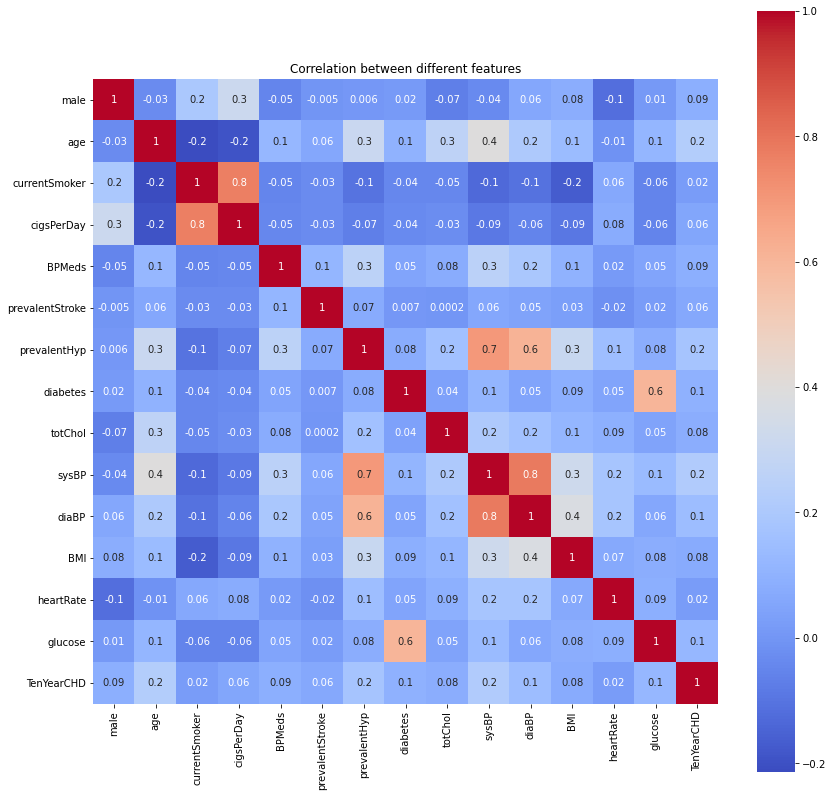

In [39]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlation, vmax=1, square=True,cmap='coolwarm',annot= True,xticklabels=True,yticklabels=True, fmt='.1g')
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different features')
plt.savefig("static/heatmap.png")